In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# df_meps = pd.read_csv('./data/silver/mep_membership_timeline.csv')

df_questions = pd.read_csv("./data/silver/questions_topics.csv", index_col=0)


questions_raw = pd.read_csv("./data/questions_details_2.csv")
questions_raw["id"] = questions_raw["id"].apply(lambda x: x.split("/")[-1])
questions_raw["creator"] = questions_raw["creator"].apply(
    lambda x: eval(x) if isinstance(x, str) else x
)
questions_raw = questions_raw.explode("creator")
questions_raw = questions_raw.drop_duplicates()

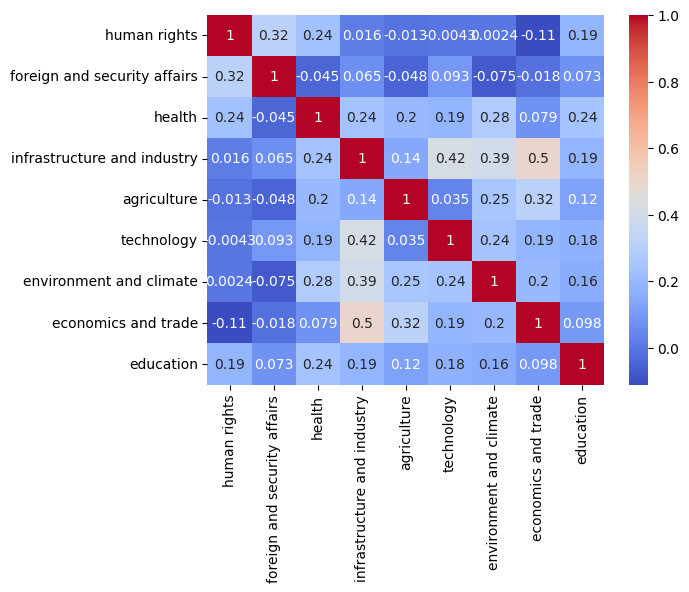

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(df_questions.iloc[:, 1:].corr(), annot=True, cmap="coolwarm")
plt.show()

- Baixa correlação entre temas: bom
- Alguma correlação entre economia e infraestritira, ok

In [3]:
df = df_questions.reset_index().merge(questions_raw, on="id", how="left")

# Avaliar concentração temática por parlamentar

In [48]:
df_g = (
    df[
        [
            "creator",
            "human rights",
            "foreign and security affairs",
            "health",
            "infrastructure and industry",
            "agriculture",
            "technology",
            "environment and climate",
            "economics and trade",
            "education",
        ]
    ]
    .groupby("creator")
    .mean()
    .reset_index()
)

df_g = df_g[[True if "person" in c else False for c in df_g["creator"]]].reset_index(
    drop=True
)

df_g.sort_values(by="human rights", ascending=False)

,creator,human rights,foreign and security affairs,health,infrastructure and industry,agriculture,technology,environment and climate,economics and trade,education
1242,person/257075,0.990601,0.721568,0.288880,0.408824,0.095640,0.107230,0.196160,0.155237,0.045030
1030,person/249284,0.983432,0.898430,0.154454,0.101372,0.060945,0.110258,0.068609,0.054980,0.090461
1068,person/256855,0.970767,0.100540,0.358811,0.297315,0.219624,0.067420,0.158599,0.108900,0.334216
1227,person/257058,0.956269,0.253563,0.371341,0.549977,0.202575,0.517242,0.801048,0.404580,0.146094
1235,person/257067,0.956269,0.253563,0.371341,0.549977,0.202575,0.517242,0.801048,0.404580,0.146094
...,...,...,...,...,...,...,...,...,...,...
1056,person/256831,0.049767,0.172526,0.067259,0.330147,0.067909,0.174572,0.955461,0.459966,0.039899
1213,person/257041,0.040220,0.839815,0.003824,0.838434,0.009121,0.026952,0.003077,0.313127,0.001251
1163,person/256980,0.040152,0.038961,0.101529,0.283636,0.065959,0.282792,0.665738,0.348304,0.062120
1160,person/256977,0.030987,0.002755,0.006052,0.182479,0.001278,0.344543,0.966947,0.032174,0.003158


- Há concentração temática em certos temas por parlamentar

# Comparar o cluster de cada parlamentar com a concentração temática

In [50]:
df_graph = pd.read_csv("./data/gold/gephi_graph_data.csv")

df_graph.head()

,Id,Label,timeset,type,modularity_class,indegree,outdegree,degree,weighted indegree,weighted outdegree,weighted degree,Authority,Hub,componentnumber,strongcompnum,stat_inf_class,clustering,eigencentrality
0,064616126640-05,Air France-KLM,NaN,Companies & groups,11,0,23,23,0,45,45,0.000000,0.034947,0,23,0,0,0.000000
1,197502,Marie-Pierre VEDRENNE,NaN,Mep,11,60,0,60,90,0,90,0.060138,0.000000,0,22,0,0,0.317460
2,197581,NaN,NaN,NaN,0,99,0,99,229,0,229,0.094578,0.000000,0,21,0,0,0.523810
3,197529,Leila CHAIBI,NaN,Mep,3,47,0,47,63,0,63,0.034219,0.000000,0,20,0,0,0.248677
4,197589,Laurence FARRENG,NaN,Mep,11,47,0,47,133,0,133,0.039436,0.000000,0,19,0,0,0.248677


In [ ]:
# tratar ids
# como só quero comprar com mep, na hora do merge não preciso condiderar o type
df_graph["id"] = df_graph["Id"].apply(lambda x: f"person/{x}")

In [100]:
df_m = df_g.merge(df_graph, left_on="creator", right_on="id", how="left")

df_m= df_m.dropna(subset=['modularity_class'])

<Axes: >

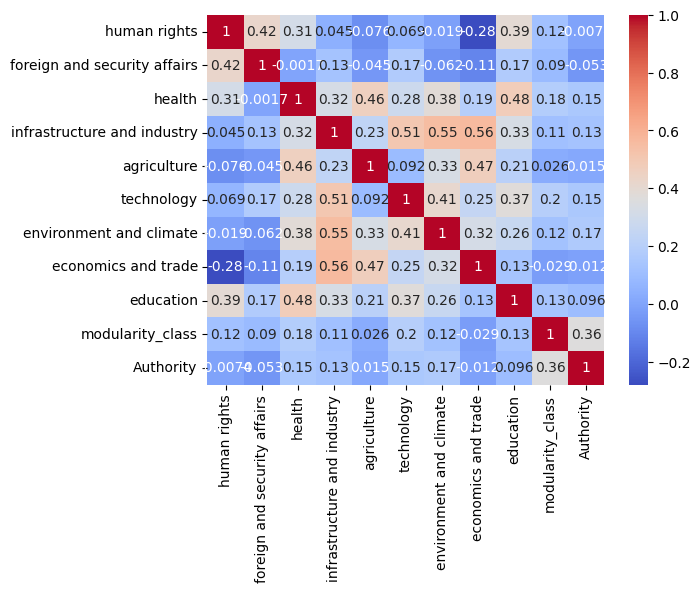

In [71]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(
    df_m[
        [
            "human rights",
            "foreign and security affairs",
            "health",
            "infrastructure and industry",
            "agriculture",
            "technology",
            "environment and climate",
            "economics and trade",
            "education",
            "modularity_class",
            "Authority",
        ]
    ].corr(),
    annot=True,
    cmap="coolwarm",
)

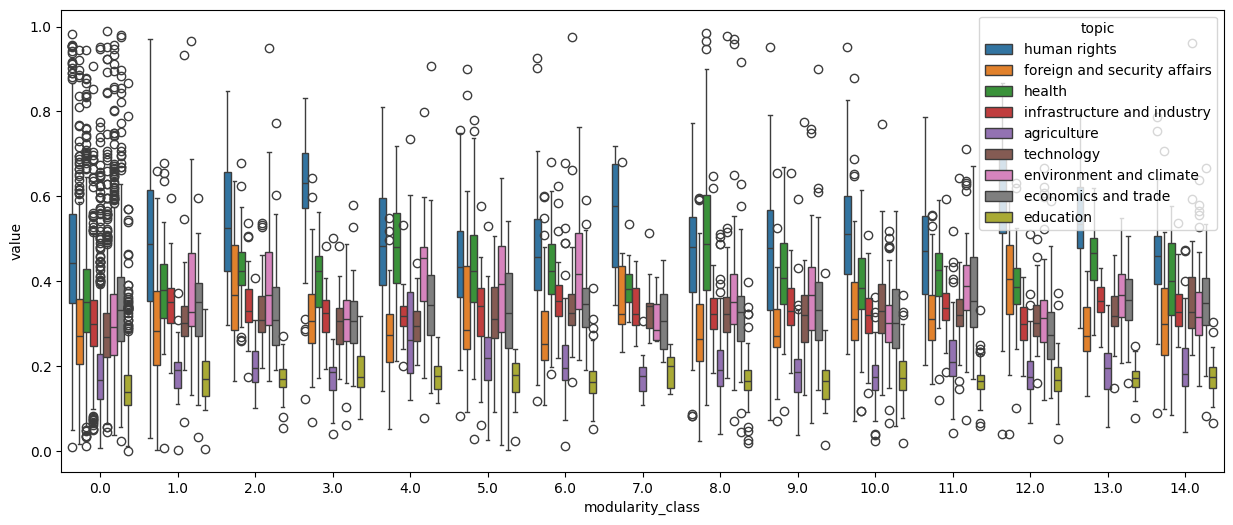

In [127]:
import seaborn as sns

X_columns = [
    "human rights",
    "foreign and security affairs",
    "health",
    "infrastructure and industry",
    "agriculture",
    "technology",
    "environment and climate",
    "economics and trade",
    "education",
]


dd=pd.melt(df_m,id_vars=['modularity_class'],value_vars=X_columns,var_name='topic')

# Set figure size to make plot wider
plt.figure(figsize=(15, 6))
sns.boxplot(x='modularity_class',y='value',data=dd,hue='topic')

plt.show()

- padrão não muito claro... vou testar utilizando regressão logística

In [134]:
from sklearn.linear_model import LogisticRegression

X_columns = [
    "human rights",
    "foreign and security affairs",
    "health",
    "infrastructure and industry",
    "agriculture",
    "technology",
    "environment and climate",
    "economics and trade",
    "education",
]

X = df_m[X_columns].fillna(0)

for mcls in df_m["modularity_class"].dropna().sort_values().unique():
    Y = [1 if c == mcls else 0 for c in df_m["modularity_class"]]

    # logit regression
    model = LogisticRegression()
    model.fit(X, Y)


    print("-"*100)
    print(mcls)
    for (c, coef) in zip(X_columns, model.coef_[0]):
        print(c, coef)

----------------------------------------------------------------------------------------------------
0.0
human rights -0.518257802277846
foreign and security affairs -0.7741837247875566
health -2.195251767610603
infrastructure and industry -0.6816839643773475
agriculture -0.09938836814653768
technology -2.0409536298638717
environment and climate -1.8505887871125657
economics and trade 1.8472341307212836
education -0.6703542298696076
----------------------------------------------------------------------------------------------------
1.0
human rights 0.19082689452002533
foreign and security affairs -0.33237970631450353
health -0.4724144935891691
infrastructure and industry 0.8260778211661404
agriculture -0.5123298428272927
technology 0.20608936847605577
environment and climate 0.9979927940027775
economics and trade -0.24928178721739208
education 0.48117799965000885
----------------------------------------------------------------------------------------------------
2.0
human rights 0.8792

- Batendo com a base dos top_ten_by_hub parecem fazer sentido esses coeficientes...

# Criar o dado em painel com informações dos parlametnares e temas

In [149]:
from datetime import datetime

## Questões

In [4]:
columns_to_keep = [
    "creator",
    "document_date",
    "human rights",
    "foreign and security affairs",
    "health",
    "infrastructure and industry",
    "agriculture",
    "technology",
    "environment and climate",
    "economics and trade",
    "education",
]
df_questions = df[columns_to_keep]

## Reuniões

In [16]:
df_meetings = pd.read_csv('./data/silver/df_meetings_lobbyists.csv')

In [17]:
df_meetings

,member_id,meeting_date,member_capacity,lobbyist_id,l_category,l_head_office_country,l_agriculture,l_economics_and_trade,l_education,l_environment_and_climate,l_foreign_and_security_affairs,l_health,l_human_rights,l_infrastructure_and_industry,technology,l_ln_max_budget,l_days_since_registration
0,197502.0,2019-07-25,Member,064616126640-05,Business,FRANCE,0,1,0,1,1,1,0,1,0,13.710150,841
1,197581.0,2019-09-17,Rapporteur,064616126640-05,Business,FRANCE,0,1,0,1,1,1,0,1,0,13.710150,895
2,197529.0,2019-09-17,Member,064616126640-05,Business,FRANCE,0,1,0,1,1,1,0,1,0,13.710150,895
3,197589.0,2019-12-17,Member,064616126640-05,Business,FRANCE,0,1,0,1,1,1,0,1,0,13.710150,986
4,197589.0,2019-12-17,Member,064616126640-05,Business,FRANCE,0,1,0,1,1,1,0,1,0,13.710150,986
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40338,208722.0,2024-09-09,Member,52836621780-65,Other,BELGIUM,1,1,1,1,1,1,1,1,1,13.815512,5582
40339,119435.0,2024-09-06,Member,840952236814-41,Other,CROATIA,1,1,1,1,0,1,0,1,1,9.210340,1726
40340,256987.0,2024-09-04,Member,999325050767-97,Other,COSTA RICA,1,0,1,1,1,0,0,0,1,17.341871,415
40341,197719.0,2024-09-04,Member,999325050767-97,Other,COSTA RICA,1,0,1,1,1,0,0,0,1,17.341871,415


In [15]:
df_meetings_filtered.groupby("Annual costs for registers activity or total budget").count()

,Unnamed: 0.1,Unnamed: 0,title,member_id,member_name,meeting_date,member_capacity,procedure_reference,attendees,lobbyist_id,...,Closed year start,Closed year end,Closed year: Intermediary (cost) or client (revenue): EU legislative proposal,Closed year EU grant: amount (source),Closed year total EU grants,Current year Intermediary or client,Current year EU grant: source (amount),Current year total,Complementary information,cat_mapped
Annual costs for registers activity or total budget,,,,,,,,,,,,,,,,,,,,,
-,166,166,166,166,166,166,166,33,166,46,...,0,0,0,0,0,83,5,5,26,166
-10000,689,689,689,689,689,689,689,142,689,264,...,689,689,44,75,75,53,56,56,186,689
0,81,81,81,81,81,81,81,11,81,21,...,81,81,16,8,8,0,1,1,16,81
0-19999,13,13,13,13,13,13,13,7,13,0,...,13,13,13,0,0,13,0,0,0,13
0-39999,3,3,3,3,3,3,3,1,3,0,...,3,3,3,0,0,3,0,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9957766,1,1,1,1,1,1,1,1,1,0,...,1,1,1,1,1,0,0,0,0,1
99857,5,5,5,5,5,5,5,0,5,2,...,5,5,5,0,0,0,0,0,0,5
999052,2,2,2,2,2,2,2,0,2,1,...,2,2,0,0,0,0,0,0,2,2


## Dados do Parlamentar

# Combine dataframes



In [8]:
# I need to transform the columns into rows
df_questions_melted = df_questions.melt(
    ignore_index=False, var_name="date", value_name="questions"
)
df_meetings_melted = df_meetings.melt(
    ignore_index=False, var_name="date", value_name="meetings"
)

# Reset index to handle duplicate indices
df_questions_melted = df_questions_melted.reset_index()
df_meetings_melted = df_meetings_melted.reset_index()

# now join the two dataframes
df_combined = pd.merge(
    df_questions_melted, df_meetings_melted, on=["member_id", "date"]
)

# Aggregate the data by week
# df_combined['date'] = pd.to_datetime(df_combined['date']).dt.strftime('%Y-%U')
# df_combined = df_combined.groupby(['member_id', 'date']).sum().reset_index()